# Policy Gradient Theorem

Policy Gradient methods are a class of **Reinforcement Learning** algorithms that optimize the parameters of a policy $\pi_\theta(a|s)$ directly by ascending the gradient of expected cumulative reward.

These methods are particularly important in **generative AI**, where the action space might be selecting tokens or pixels, and the reward comes from human feedback or some task-specific signal.


## 1. Markov Decision Process (MDP) Setup

At time $t$, the agent observes state $s_t$, chooses action $a_t \sim \pi_\theta(a_t|s_t)$, and receives reward $r_t$.  

The objective is to maximize expected cumulative reward:

$$
J(\theta) = \mathbb{E}_{\pi_\theta} \Big[ \sum_{t=0}^{T} r_t \Big]
$$

---

## 2. Policy Gradient Theorem

The gradient of $J(\theta)$ w.r.t policy parameters $\theta$ is given by:

$$
\nabla_\theta J(\theta) = \mathbb{E}_{\pi_\theta} \Big[ \nabla_\theta \log \pi_\theta(a_t|s_t) \cdot Q^{\pi_\theta}(s_t, a_t) \Big]
$$

Where $Q^{\pi_\theta}(s_t, a_t)$ is the expected return starting from $s_t$ taking action $a_t$:

$$
Q^{\pi_\theta}(s_t, a_t) = \mathbb{E}_{\pi_\theta} \Big[ \sum_{k=0}^{T-t} r_{t+k} \Big]
$$

Parameter update:

$$
\theta \leftarrow \theta + \eta \cdot \nabla_\theta J(\theta)
$$

This is the foundation of **REINFORCE** algorithm.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# Toy environment: target pixel value (like MNIST pixel intensity)
target_pixel = 0.8  # normalized [0,1] pixel value

def reward_function(action):
    """Reward higher when closer to target pixel intensity."""
    return - (action - target_pixel)**2


We model the policy as a Gaussian with mean parameter $\mu_\theta$:

$$
a_t \sim \pi_\theta(a_t|s_t) = \mathcal{N}(\mu_\theta, \sigma^2)
$$

Log-probability gradient:

$$
\nabla_\theta \log \pi_\theta(a_t|s_t) = \frac{a_t - \mu_\theta}{\sigma^2}
$$

Parameter update:

$$
\mu_\theta \leftarrow \mu_\theta + \eta \cdot r_t \cdot \frac{a_t - \mu_\theta}{\sigma^2}
$$


In [2]:
# Policy parameters
mu_theta = 0.0
sigma = 0.3
eta = 0.1

mu_history = []
reward_history = []

episodes = 50

for ep in range(episodes):
    # Sample action from Gaussian policy
    action = np.random.normal(mu_theta, sigma)

    # Compute reward
    r = reward_function(action)

    # Compute gradient of log-prob
    grad_log = (action - mu_theta) / (sigma**2)

    # Policy parameter update
    mu_theta += eta * r * grad_log

    # Store history
    mu_history.append(mu_theta)
    reward_history.append(r)

    print(f"Episode {ep+1}: action={action:.2f}, reward={r:.4f}, mu_theta={mu_theta:.4f}")


Episode 1: action=0.15, reward=-0.4238, mu_theta=-0.0702
Episode 2: action=-0.11, reward=-0.8311, mu_theta=-0.0319
Episode 3: action=0.16, reward=-0.4065, mu_theta=-0.1196
Episode 4: action=0.34, reward=-0.2141, mu_theta=-0.2283
Episode 5: action=-0.30, reward=-1.2068, mu_theta=-0.1341
Episode 6: action=-0.20, reward=-1.0087, mu_theta=-0.0554
Episode 7: action=0.42, reward=-0.1456, mu_theta=-0.1321
Episode 8: action=0.10, reward=-0.4926, mu_theta=-0.2581
Episode 9: action=-0.40, reward=-1.4374, mu_theta=-0.0331
Episode 10: action=0.13, reward=-0.4494, mu_theta=-0.1144
Episode 11: action=-0.25, reward=-1.1097, mu_theta=0.0570
Episode 12: action=-0.08, reward=-0.7792, mu_theta=0.1780
Episode 13: action=0.25, reward=-0.3019, mu_theta=0.1536
Episode 14: action=-0.42, reward=-1.4893, mu_theta=1.1034
Episode 15: action=0.59, reward=-0.0458, mu_theta=1.1298
Episode 16: action=0.96, reward=-0.0259, mu_theta=1.1346
Episode 17: action=0.83, reward=-0.0009, mu_theta=1.1349
Episode 18: action=1.23

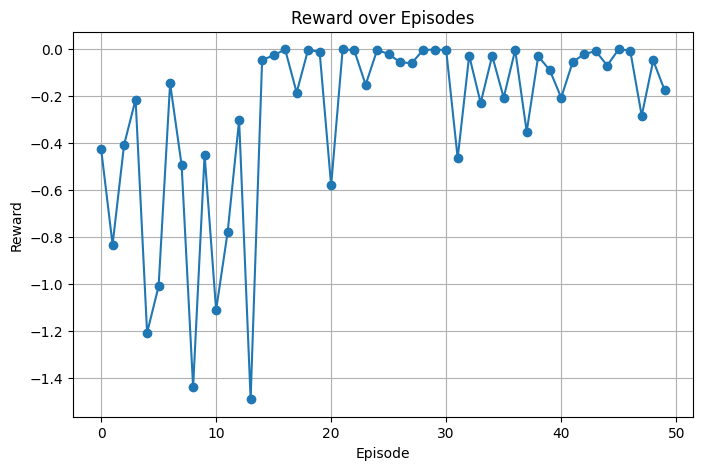

In [3]:
plt.figure(figsize=(8,5))
plt.plot(reward_history, marker='o')
plt.title("Reward over Episodes")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()


<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipython-input-3544779090.py:4: SyntaxWarning: invalid escape sequence '\m'
  plt.title("Policy Mean ($\mu_\\theta$) Evolution")


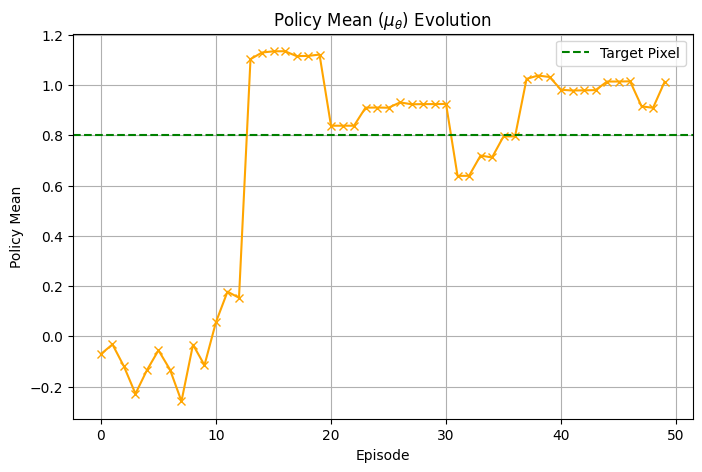

In [4]:
plt.figure(figsize=(8,5))
plt.plot(mu_history, marker='x', color='orange')
plt.axhline(target_pixel, color='green', linestyle='--', label='Target Pixel')
plt.title("Policy Mean ($\mu_\\theta$) Evolution")
plt.xlabel("Episode")
plt.ylabel("Policy Mean")
plt.legend()
plt.grid()
plt.show()


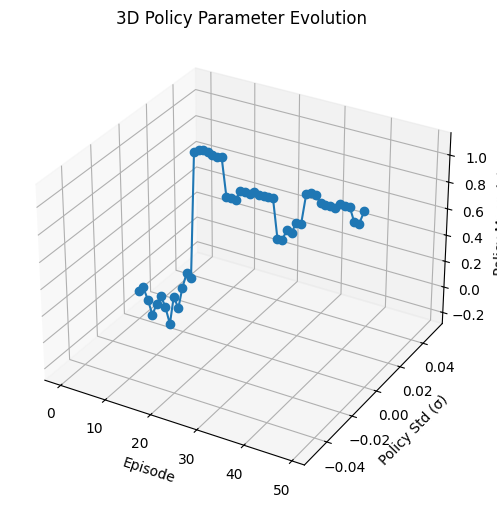

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# Create meshgrid
episodes_grid = np.arange(episodes)
sigma_grid = np.full_like(episodes_grid, sigma)
mu_grid = np.array(mu_history)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(episodes_grid, sigma_grid, mu_grid, marker='o')
ax.set_xlabel("Episode")
ax.set_ylabel("Policy Std (σ)")
ax.set_zlabel("Policy Mean (μ)")
ax.set_title("3D Policy Parameter Evolution")
plt.show()


## Interpretation

1. Initially, the policy mean $\mu_\theta$ is far from the target pixel.
2. With each policy gradient update, $\mu_\theta$ moves closer to the target, maximizing expected reward.
3. Reward increases as the policy aligns with the target.

---

## Use Case in Generative AI

* Generative models (e.g., text or image generation) can be seen as **choosing actions** (tokens or pixels).
* Reward signals come from human feedback (RLHF) or task-specific objectives.
* Policy gradient updates allow the generative model to **align with preferences** without explicit supervised labels.
